# Exploratory Data Analysis - Moritz 
___

## Import Libraries

In [101]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [102]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701


## Data Analysis

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175440 non-null  int64  
 1   TIMESTAMP  175440 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175440 non-null  float64
 4   V10        175440 non-null  float64
 5   U100       175440 non-null  float64
 6   V100       175440 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.4+ MB


In [104]:
# Cast TIMESTAMP to be of pandas datetime format
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ZONEID     175440 non-null  int64         
 1   TIMESTAMP  175440 non-null  datetime64[ns]
 2   TARGETVAR  175265 non-null  float64       
 3   U10        175440 non-null  float64       
 4   V10        175440 non-null  float64       
 5   U100       175440 non-null  float64       
 6   V100       175440 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 9.4 MB


In [105]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799


The data set comprises six variables:
- ZONEID: The windpark ID
- TIMESTAMP: The timestamp of the observation
- TARGETVAR: The normalized electricity production at timestamp t
- U10/U100: Eastward wind at height above ground 10m and height 100m
- V10/V100: Northward wind at height above ground 10m and height 100m

In [106]:
# Add columns for windspeed at the two different heights
df.eval('ws10 = (U10 ** 2 + V10 ** 2) ** 0.5', inplace=True)
df.eval('ws100 = (U100 ** 2 + V100 ** 2) ** 0.5', inplace=True)

# Add columns for wind direction at the two different heights
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332


In [107]:
def uv_to_winddir(u,v):
    return (180 + 180 / np.pi * np.arctan2(u,v)) % 360

df['wd10'] = np.round(uv_to_winddir(df.U10, df.V10), 0)
df.head()


,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0


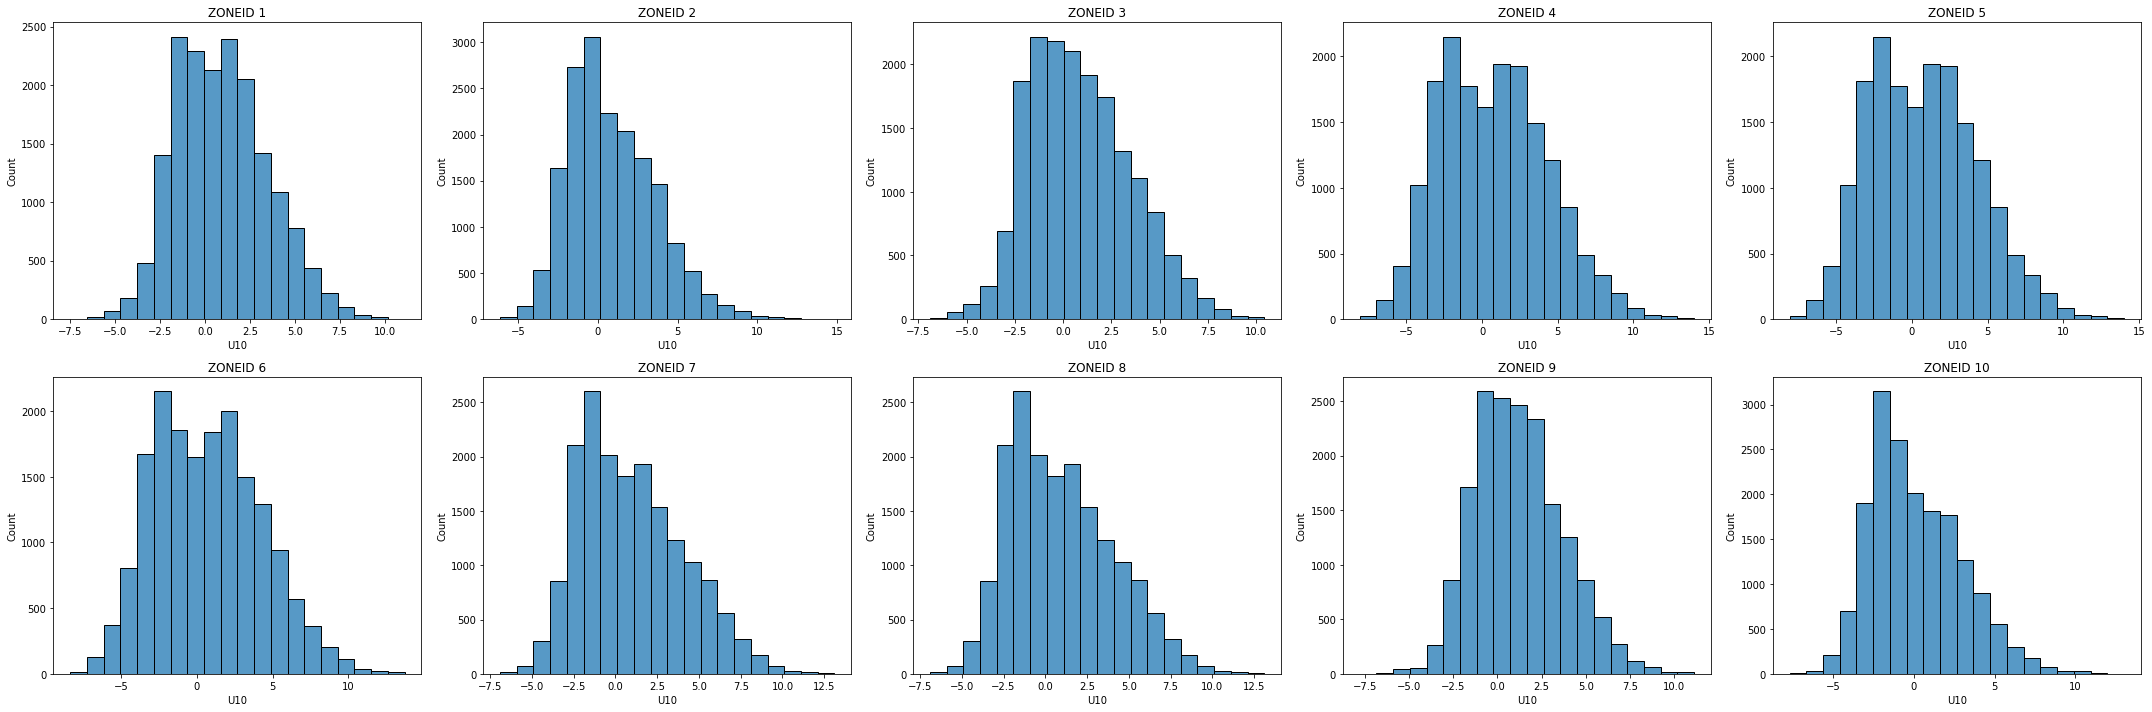

In [108]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'U10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()



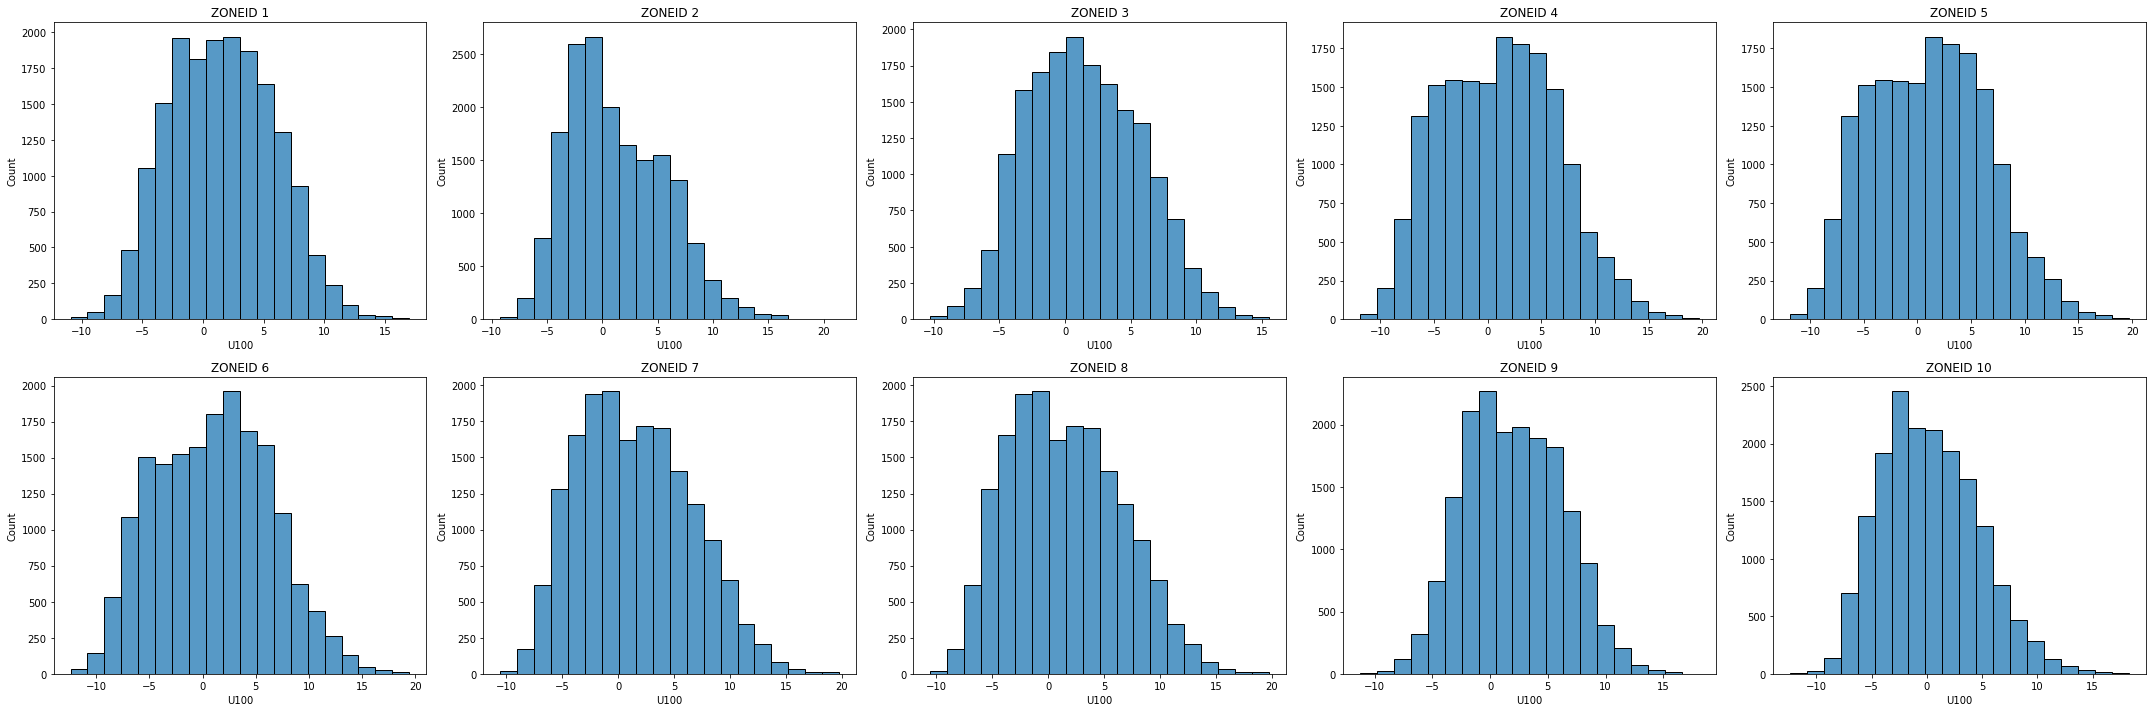

In [109]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'U100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

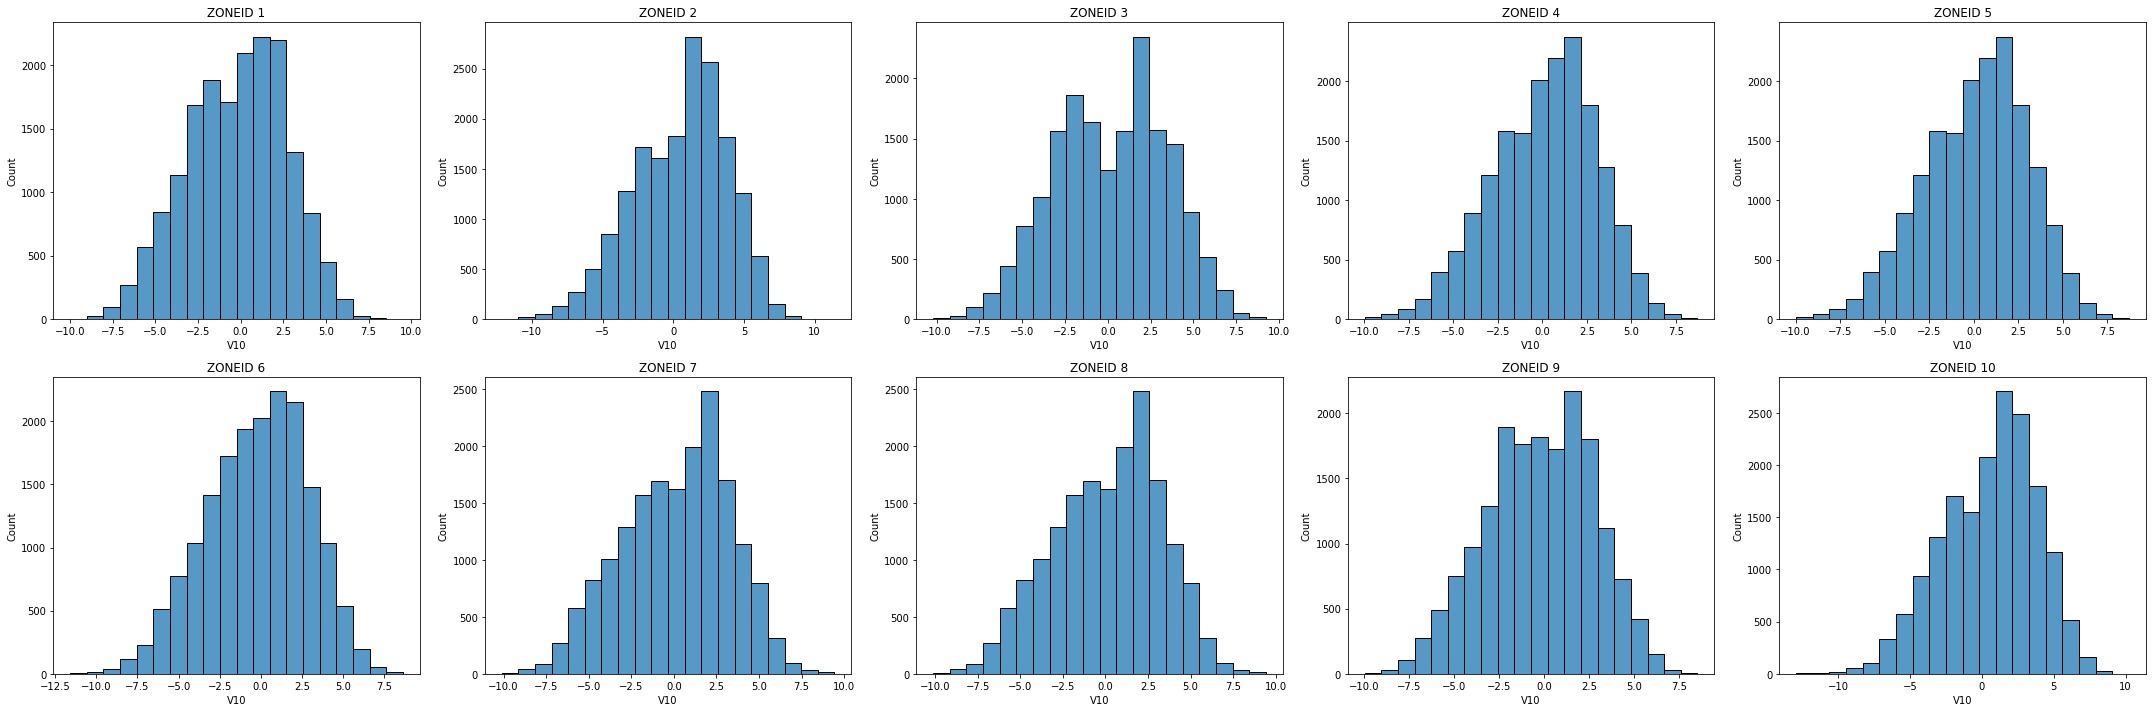

In [110]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'V10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

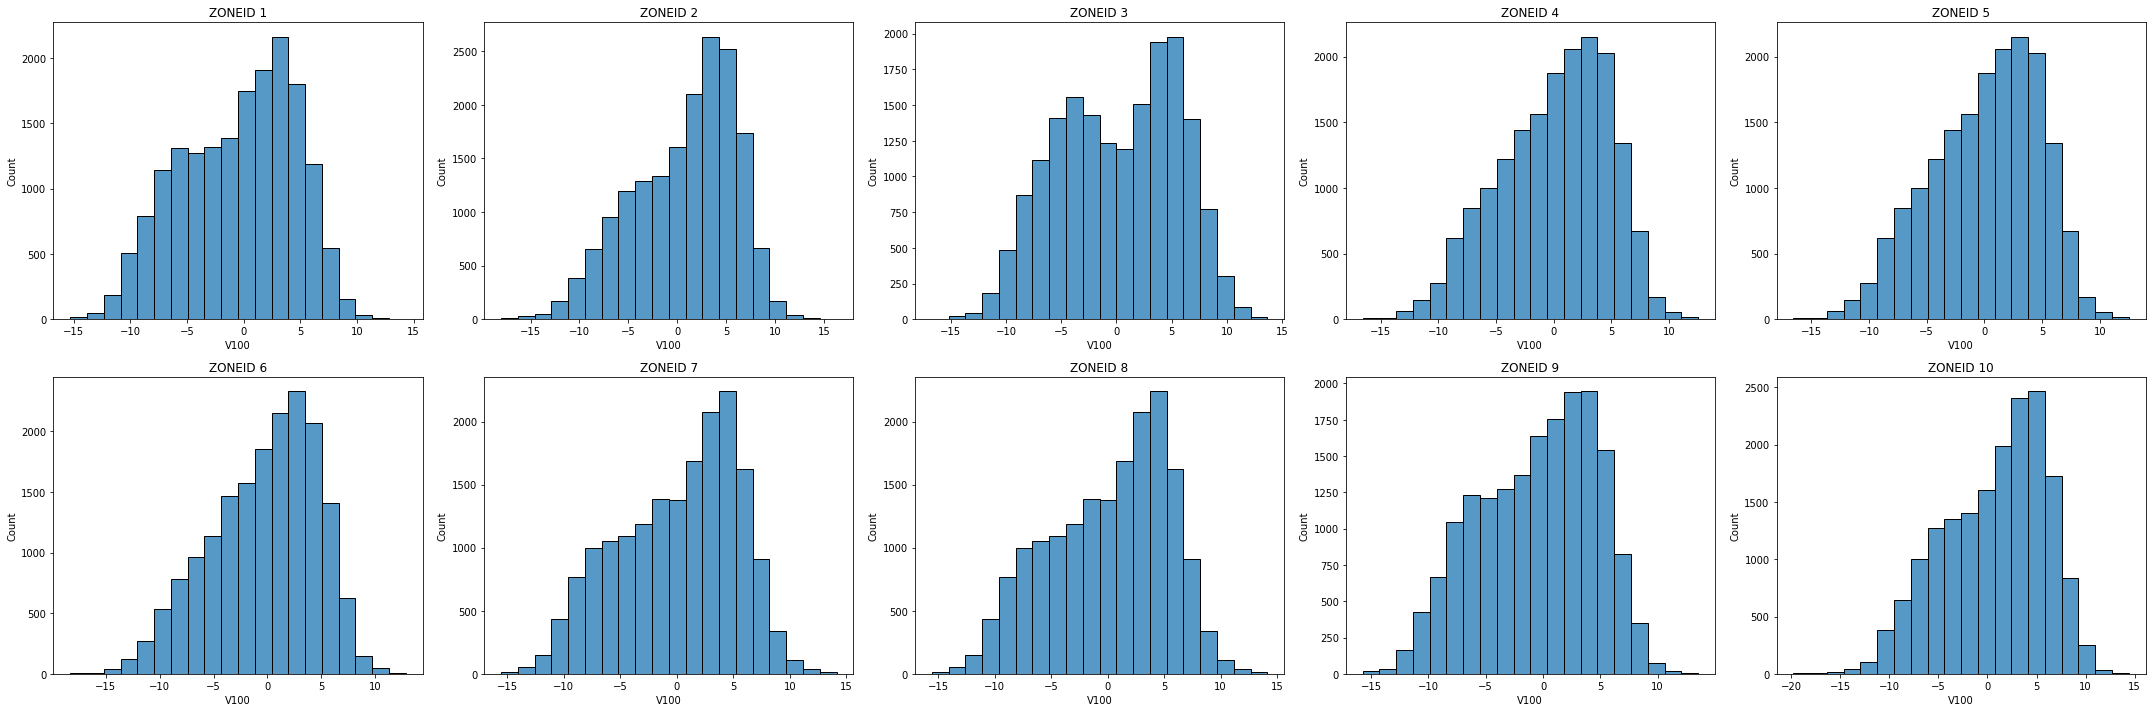

In [111]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'V100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

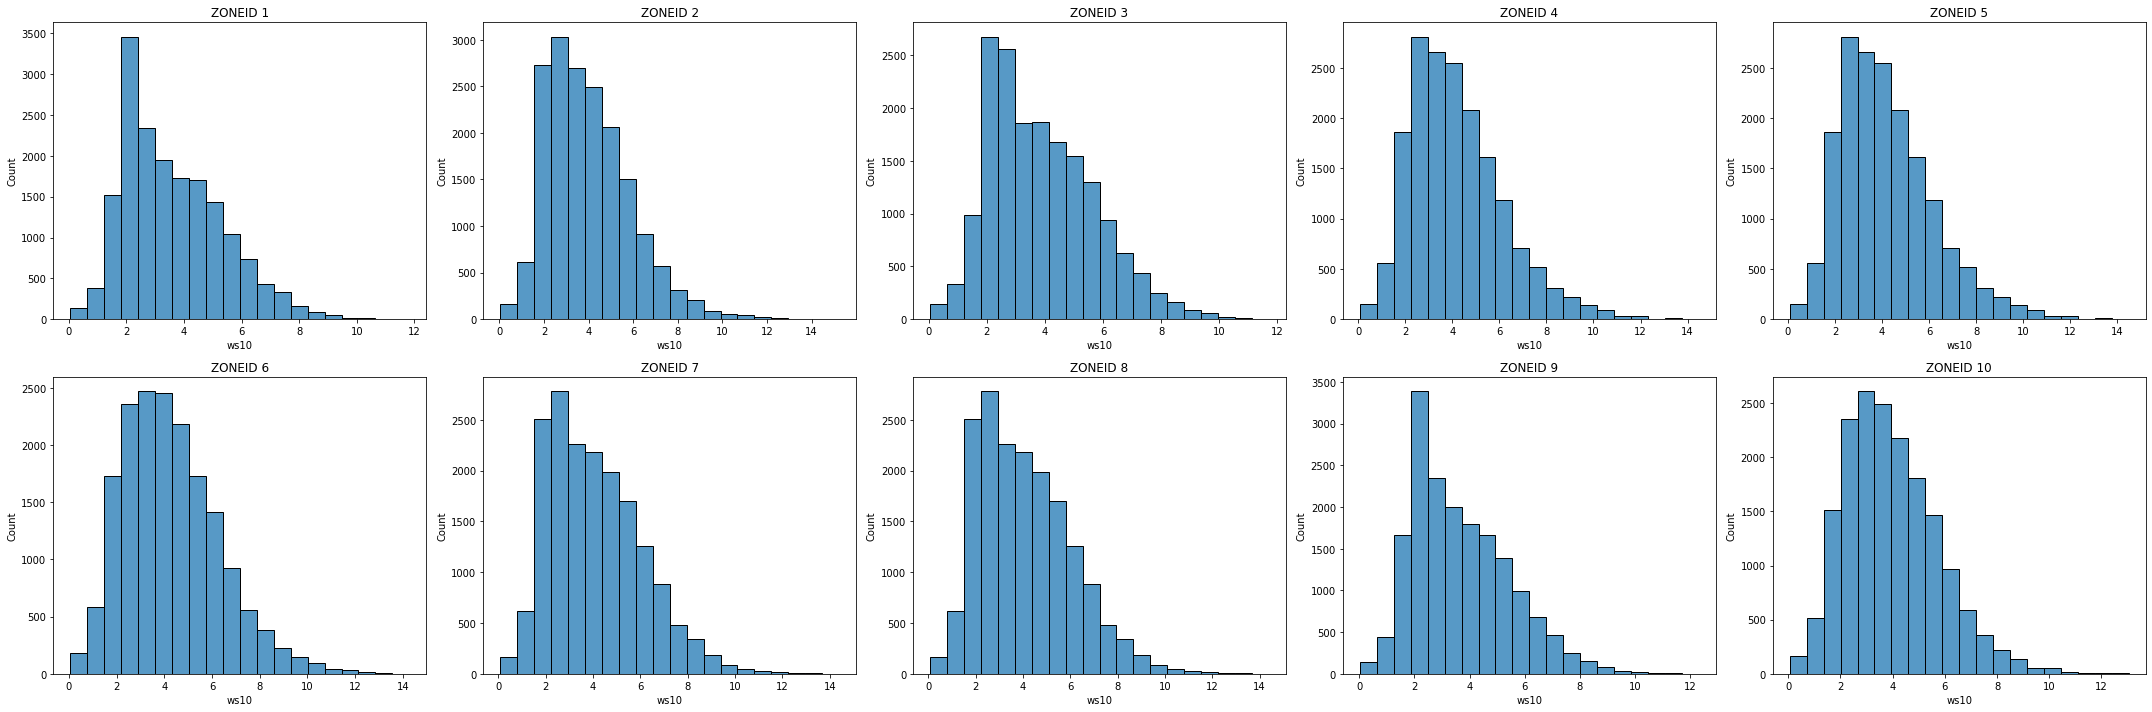

In [112]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

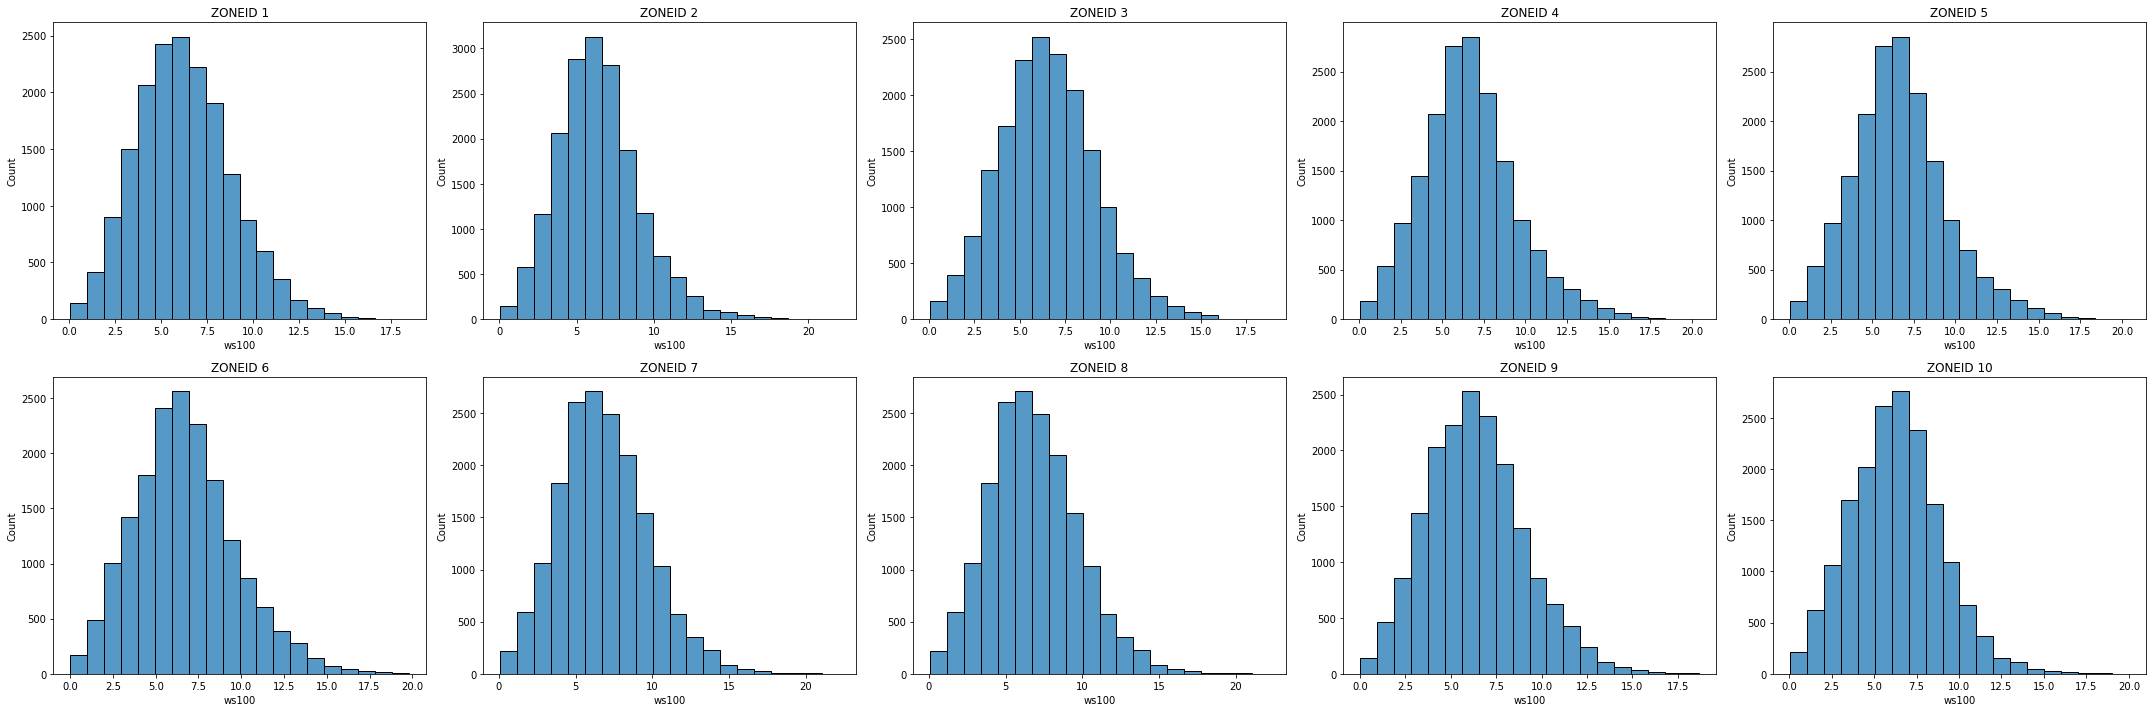

In [113]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

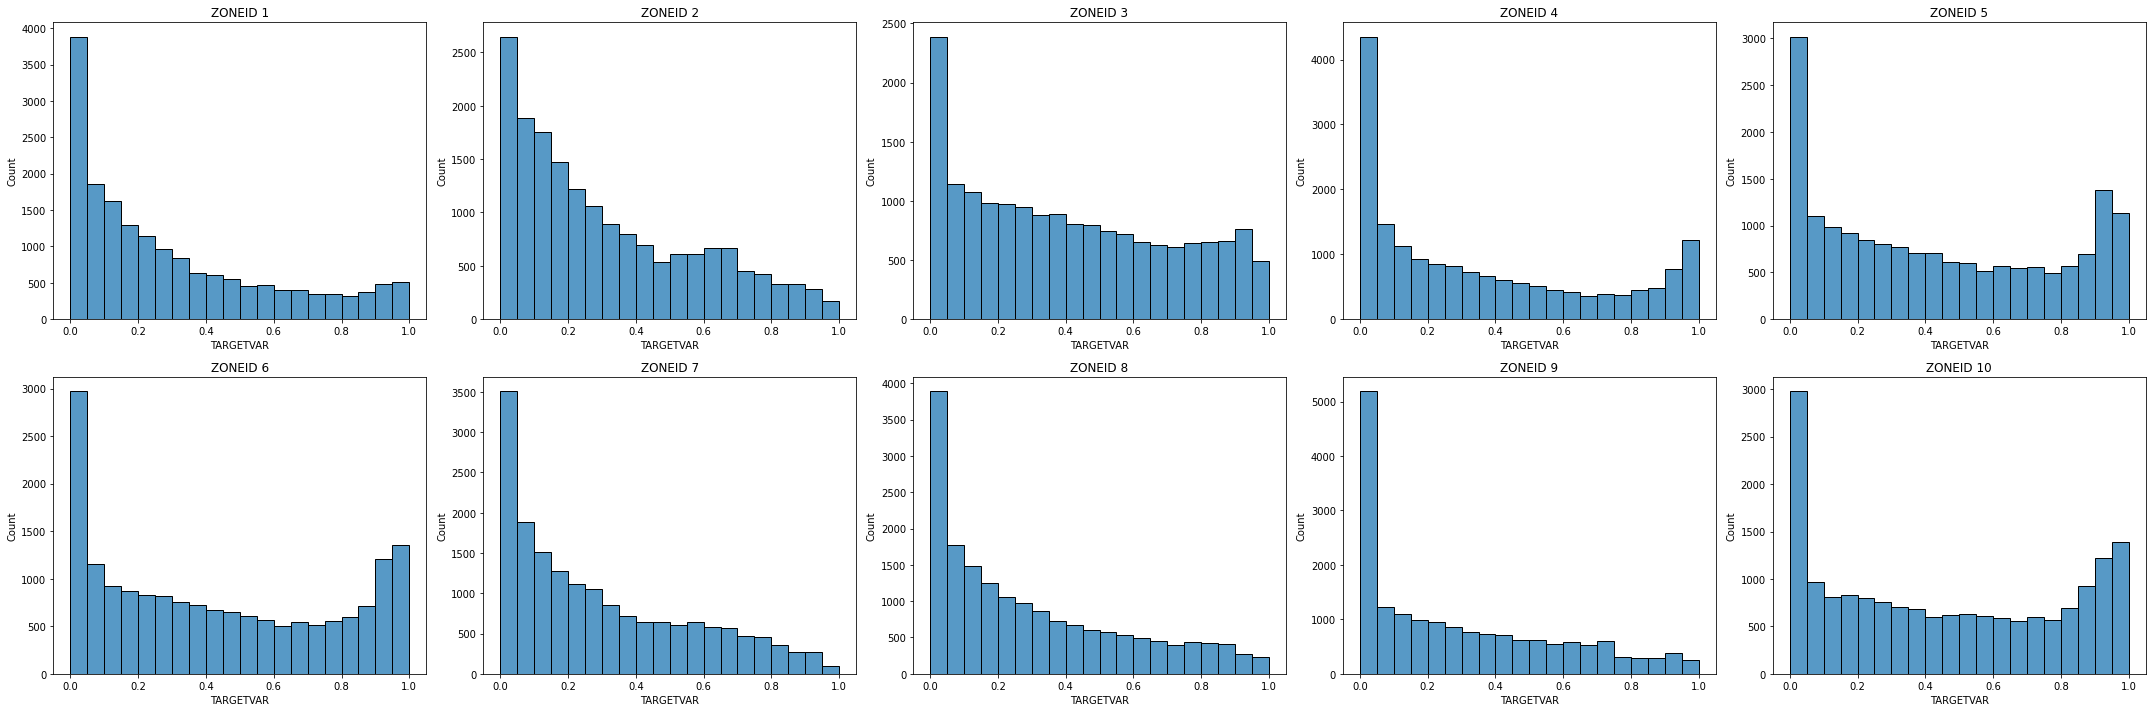

In [114]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'TARGETVAR', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

## Analysis by time

In [115]:
df['HOUR'] = df.TIMESTAMP.dt.hour
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,HOUR
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,2
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,3
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,4
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,5


In [132]:
df['MONTH'] = df.TIMESTAMP.dt.month
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,HOUR,MONTH
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,1,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,2,1
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,3,1
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,4,1
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,5,1


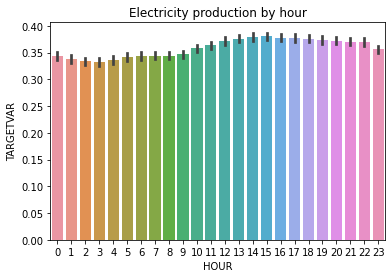

In [116]:
sns.barplot(data = df, x = 'HOUR', y = 'TARGETVAR')
plt.title('Electricity production by hour')
plt.show()

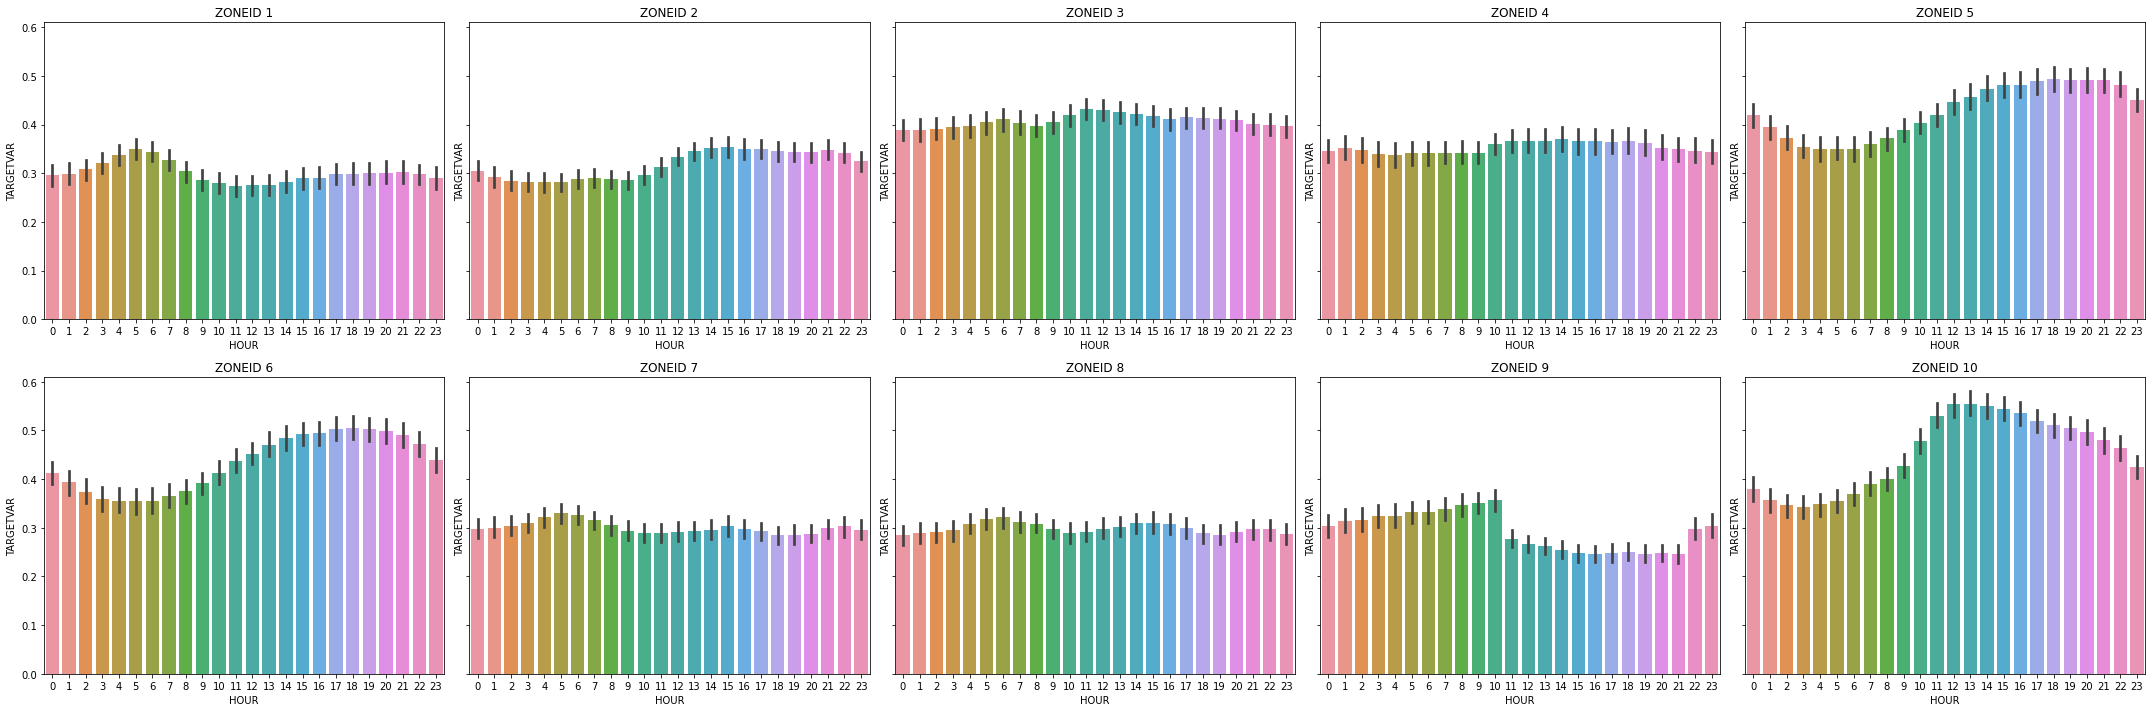

In [124]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    gb = df[df['ZONEID'] == zone].groupby(by = ['HOUR']).mean()
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

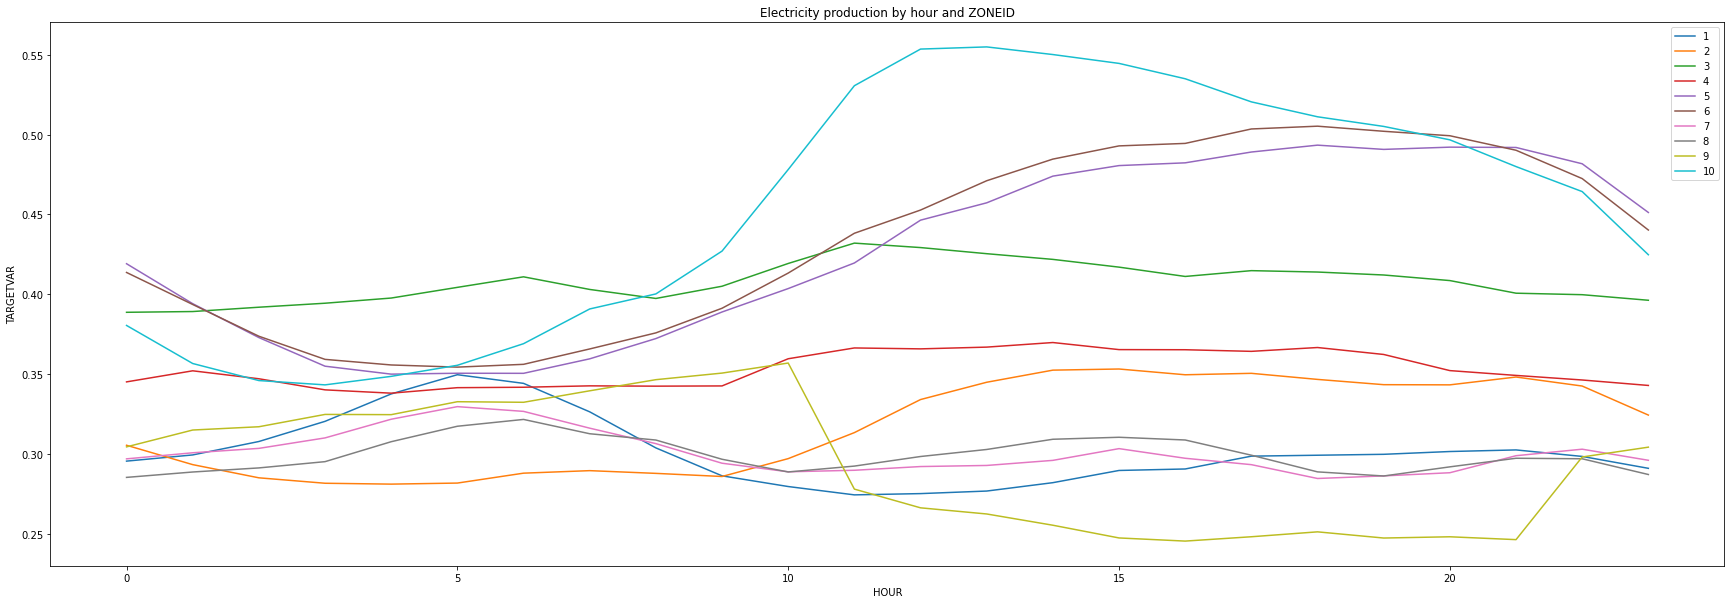

In [128]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(1,1,figsize = (30, 10))

for zone in zones:
    gb = df[df['ZONEID'] == zone].groupby(by = ['HOUR']).mean()
    sns.lineplot(data = gb, x = 'HOUR', y = 'TARGETVAR')
    plt.title('Electricity production by hour and ZONEID')
    plt.legend(zones)

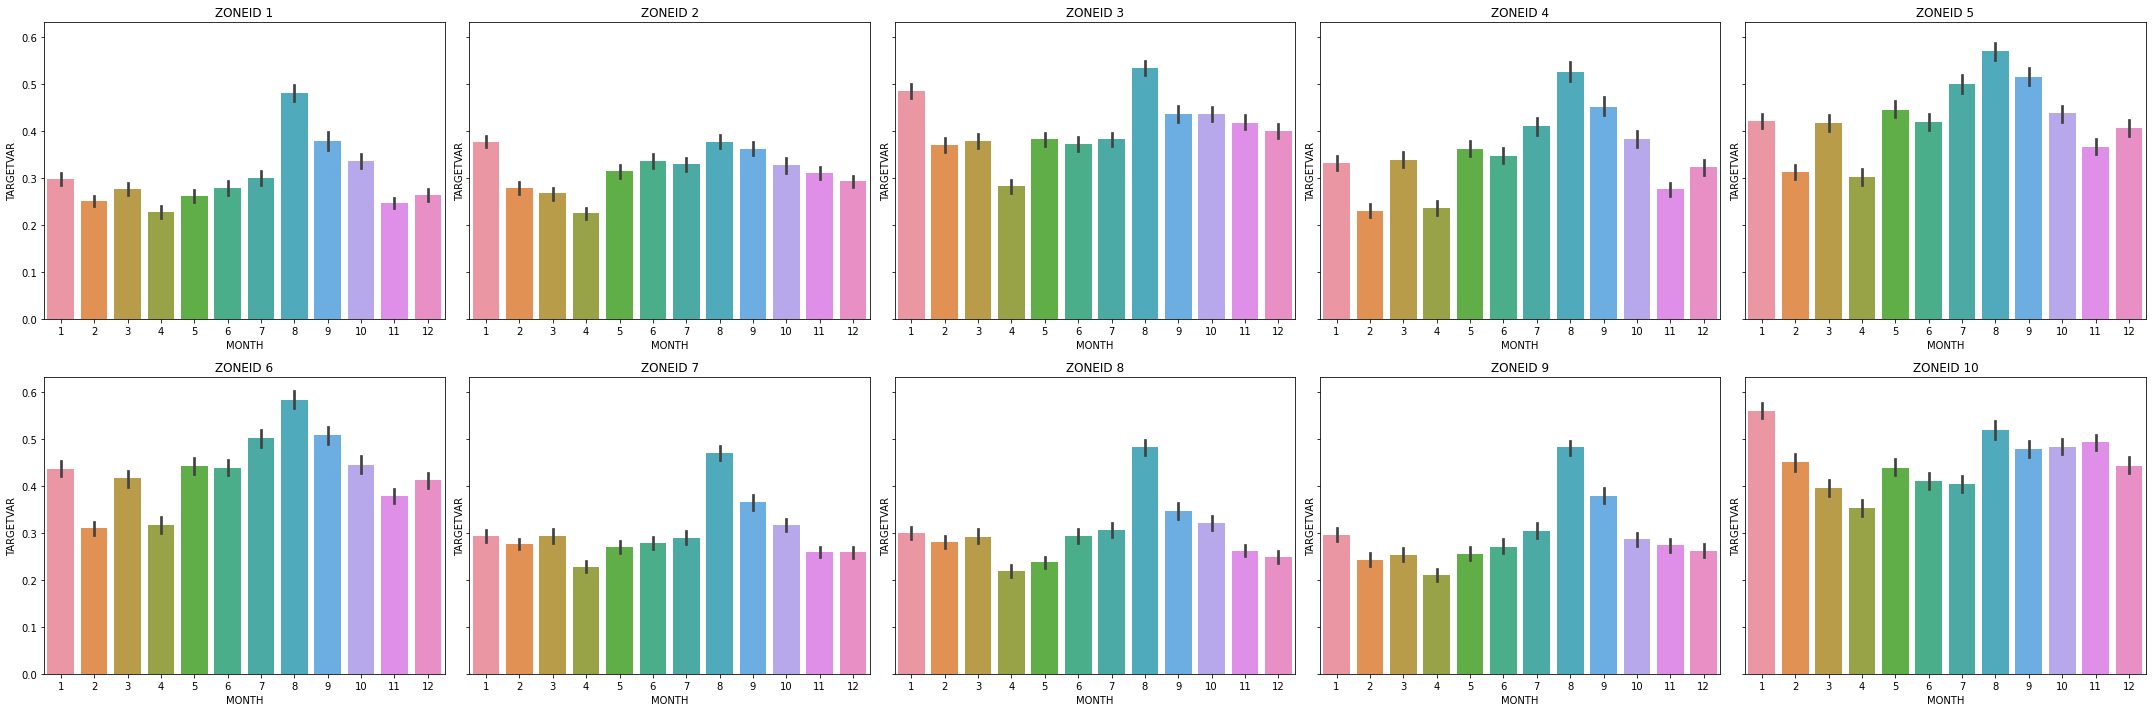

In [133]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'MONTH', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

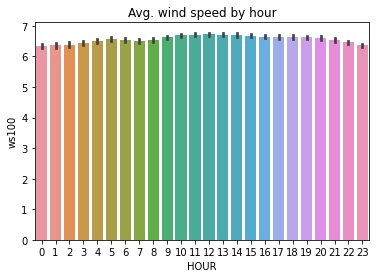

In [117]:
sns.barplot(data = df, x = 'HOUR', y = 'ws100')
plt.title('Avg. wind speed by hour')
plt.show()

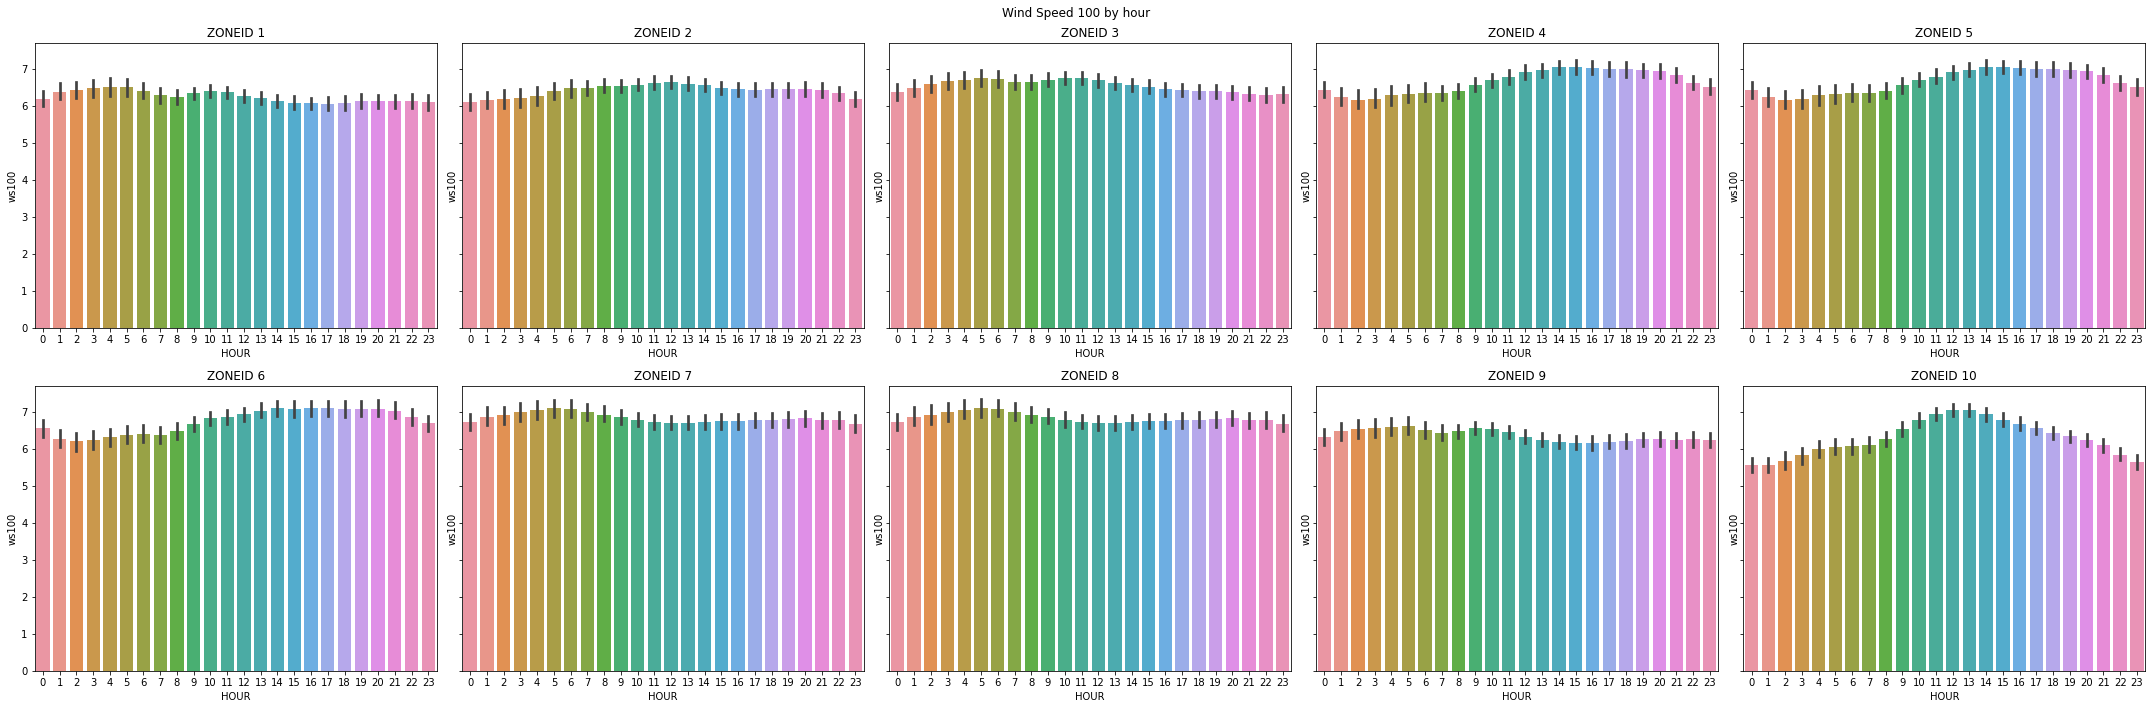

In [131]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'ws100', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))
    
fig.suptitle('Wind Speed 100 by hour')

fig.tight_layout()

<AxesSubplot:xlabel='HOUR', ylabel='ws100'>

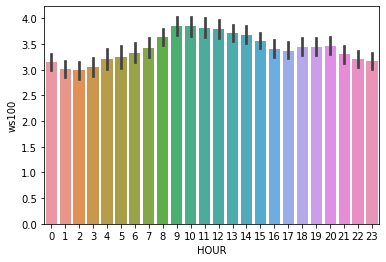

In [118]:
df_zero = df[df.TARGETVAR == 0 | df.TARGETVAR.isna()]
df_zero
sns.barplot(data = df_zero, x = 'HOUR', y = 'ws100')

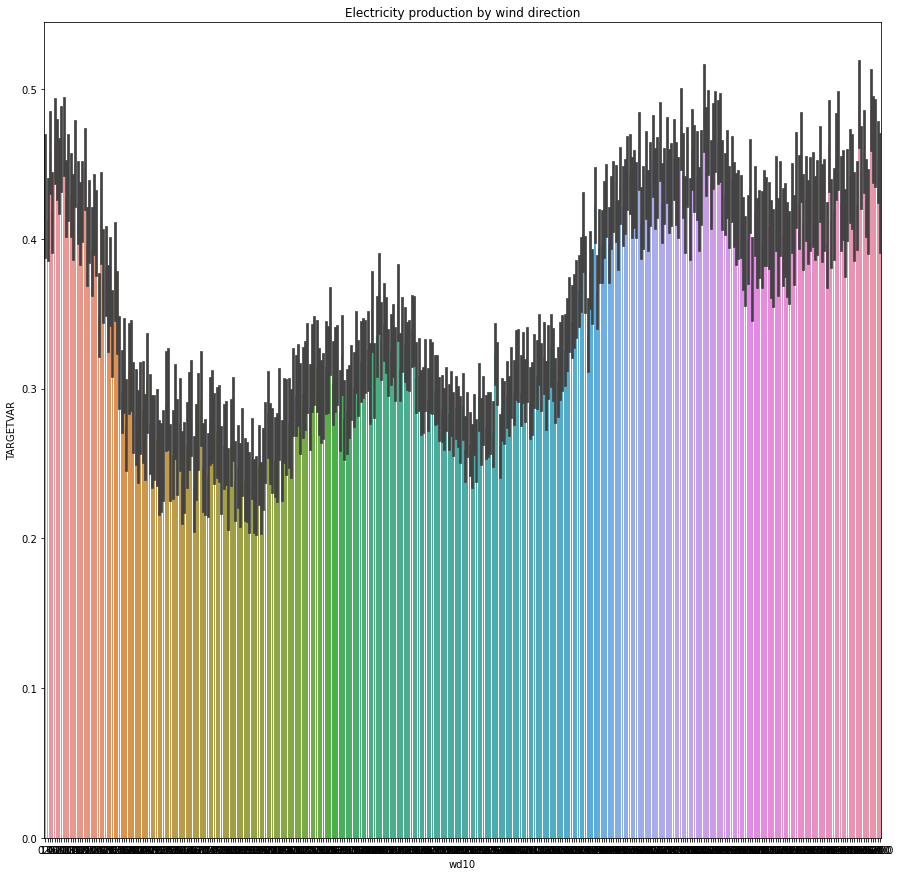

In [119]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data = df, x = 'wd10', y = 'TARGETVAR', ax = ax)
plt.title('Electricity production by wind direction')
plt.show()

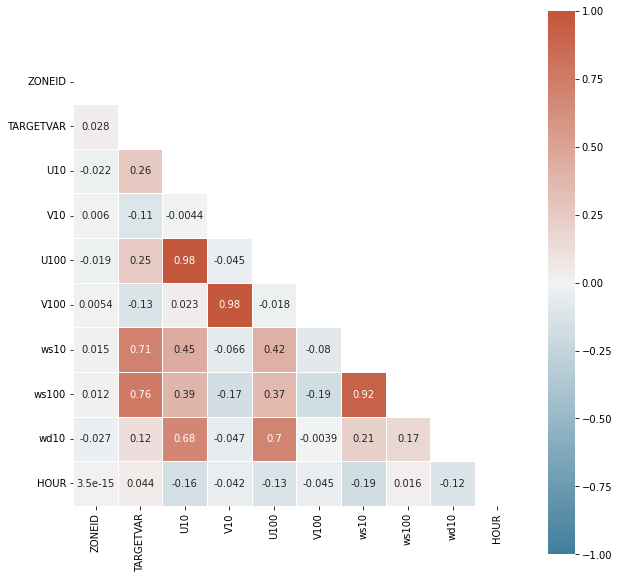

In [120]:
fig, ax = plt.subplots(figsize= (10,10))
cmap = sns.diverging_palette(230,20, as_cmap=True)
ax = sns.heatmap( df.corr(), mask = np.triu(np.ones_like(df.corr(), dtype = bool)),cmap = cmap, vmin = -1, vmax= 1, center = 0, annot = True, square = True, linewidths= .5)

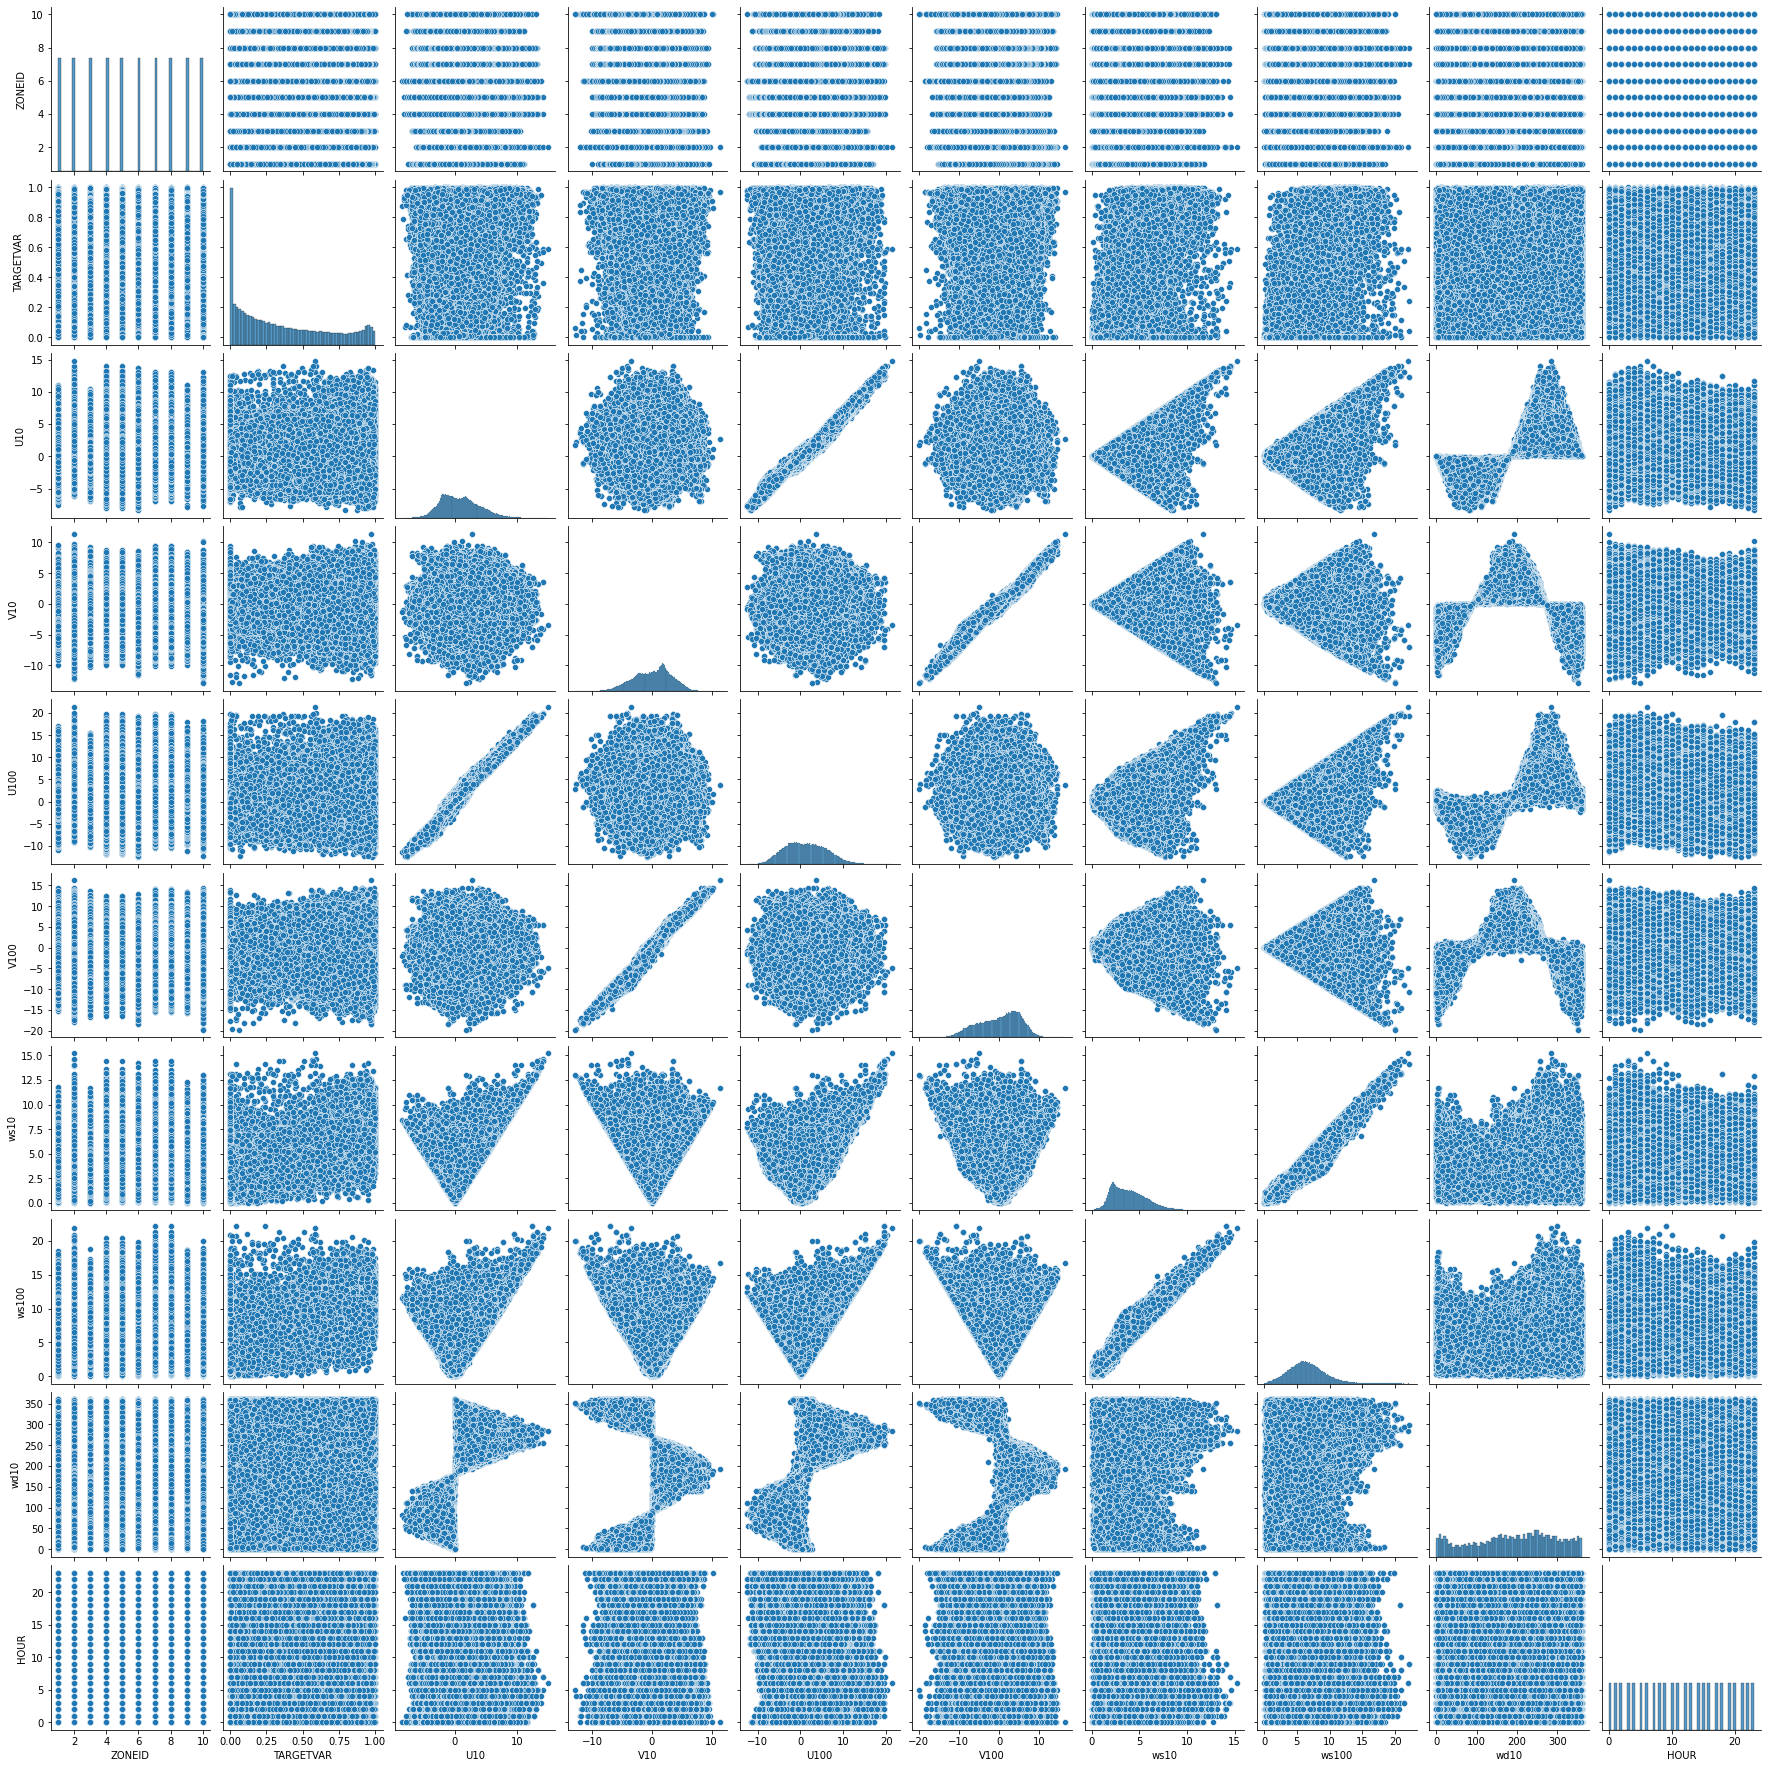

In [121]:
sns.pairplot(df)

<AxesSubplot:xlabel='ws10', ylabel='TARGETVAR'>

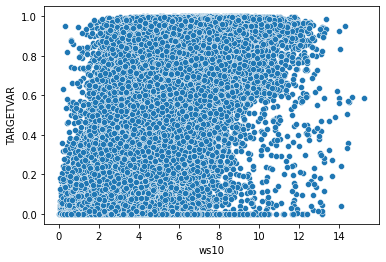

In [122]:
sns.scatterplot(x = 'ws10', y = 'TARGETVAR', data = df)